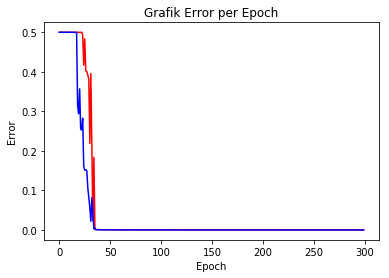

In [15]:
#import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#read data
datairis = pd.read_csv('iris_tomi.csv', delimiter = ',')
datairis = datairis.head(100)
datairis = shuffle(datairis)

#definisi fungsi 
def sigmoid(x):
    sigmoid = 1/(1 + np.exp(-1*x))
    return sigmoid

def inisialisasi(n):
    tetha = np.ones((n,1)) 
    b = np.ones((1,1)) 
    return tetha,b

def dwb(activ,X,Y):
    dtethabias = 2*(activ-Y)*(1-activ)*activ*X
    
    return dtethabias

def htetha(tetha,b, X):
    ht = np.zeros(1)
    ht = (np.dot(np.transpose(tetha), X) + b)
    return ht

def errorrow(activ,fact):
    err = (activ-fact)**2
    return err

def predict(activ):
    if(activ) < 0.5:
        return 0
    else:
        return 1
    
def confusion_matrix(fact, predict):
    true = 0
    total = len(fact)
    for i in range(len(fact)):
        if fact[i] == predict[i]: 
            true = true + 1
    
    return true/total
    
#inisialisasi variabel 
epoch = 300
k = 5
alpha1 = 0.1
alpha2 = 0.8

trainerror = np.zeros((k,epoch))
validerror = np.zeros((k,epoch))
trainaccuracy = np.zeros((k,epoch))
validaccuracy = np.zeros((k,epoch))

dtetha = np.zeros(4)
dbias = np.zeros(1)
prediction = np.zeros(80)
predictionvalid = np.zeros(20)


for i in range(k):
    awal = ((len(datairis)//k)*i)
    akhir = awal + (len(datairis)//k)
    x_valid = datairis.iloc[awal:akhir,:4].values
    Y_valid = datairis.iloc[awal:akhir,-1].values
    if(awal == 0):
        x_train = datairis.iloc[akhir:100,:4].values
        Y_train = datairis.iloc[akhir:100, -1].values
    elif (akhir == (len(datairis)) ):
        x_train = datairis.iloc[0:awal,:4].values
        Y_train = datairis.iloc[0:awal,-1].values
    else:
        x_train = np.vstack([datairis.iloc[:awal,:4].values,datairis.iloc[akhir:100,:4].values])
        Y_train = np.hstack([datairis.iloc[:awal,-1].values,datairis.iloc[akhir:100,-1].values])
    
    jumtrain = len(Y_train)
    jumvalid = len(Y_valid)
    
    inittetha, initb = inisialisasi(4)
    
    
    for n in range(epoch):
        totalerror = 0
        
        #training data
        for m in range(jumtrain):
            tetha1 = inittetha.copy()
            bias1 = initb.copy()
            
            nilaih = htetha(tetha1,bias1, x_train[m,:])

            fsigmoid = sigmoid(nilaih)
            prediction[m] = predict(fsigmoid)
            error = errorrow(fsigmoid,Y_train[m])

            for j in range(len(dtetha)):
                dtetha[j] = dwb(fsigmoid,x_train[m,j],Y_train[m])
            
            dbias = dwb(fsigmoid,1,Y_train[m])
            
            for l in range(len(tetha1)):
                inittetha[l] = tetha1[l] - (alpha2*dtetha[l])
            
            initbias = bias1 - (alpha2*dbias)
            totalerror = totalerror + error
        
        trainerror[i][n] = totalerror/jumtrain
        trainaccuracy[i][n] = confusion_matrix(Y_train, prediction)
        
        #validation
        totalerror = 0
        
        for o in range (jumvalid):
            nilaihvalid = htetha(inittetha, initbias, x_valid[o,:])
            fsigmoid = sigmoid(nilaihvalid)
            predictionvalid[o] = predict(fsigmoid)

            error = errorrow(fsigmoid,Y_valid[o])
            totalerror = totalerror + error
        
        validerror[i][n] = totalerror/jumvalid
        validaccuracy[i][n] = confusion_matrix(Y_train, prediction)
        

sumvalid = np.zeros(epoch)
sumtrain = np.zeros(epoch)
trainakurasi = np.zeros(epoch)
validakurasi = np.zeros(epoch)


for j in range (epoch):
    for i in range (k):
        sumvalid[j] = sumvalid[j] + trainerror[i][j]
        sumtrain[j] = sumtrain[j] + validerror[i][j]
        trainakurasi[j] = trainakurasi[j] + trainaccuracy[i][j]
        validakurasi[j] = validakurasi[j] + validaccuracy[i][j]
    sumvalid[j] = sumvalid[j]/5
    sumtrain[j] = sumtrain[j]/5
    trainakurasi[j] = trainakurasi[j]/5
    validakurasi[j] = validakurasi[j]/5

# create plot
plt.clf()
x = np.arange(epoch)
y1 = sumtrain.copy()
y2 = sumvalid.copy()

plt.plot(x,y1, color ='red')
plt.plot(x,y2, color = 'blue')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Grafik Error per Epoch")
plt.show()
              

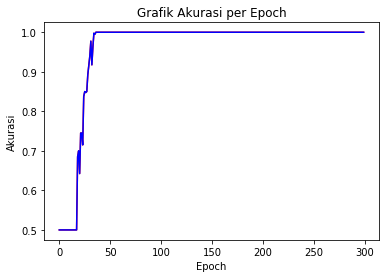

In [16]:
# create plot
plt.clf()

x = np.arange(epoch)
y1 = trainakurasi.copy()
y2 = validakurasi.copy()

plt.plot(x,y1, color ='red')
plt.plot(x,y2, color = 'blue')
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.title("Grafik Akurasi per Epoch")
plt.show()

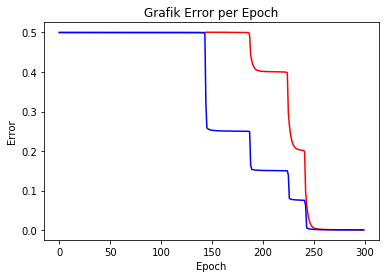

In [17]:
#learning rate 0.1
    
#inisialisasi variabel 
epoch = 300
k = 5
alpha1 = 0.1
alpha2 = 0.8

trainerror = np.zeros((k,epoch))
validerror = np.zeros((k,epoch))
trainaccuracy = np.zeros((k,epoch))
validaccuracy = np.zeros((k,epoch))

dtetha = np.zeros(4)
dbias = np.zeros(1)
prediction = np.zeros(80)
predictionvalid = np.zeros(20)


for i in range(k):
    awal = ((len(datairis)//k)*i)
    akhir = awal + (len(datairis)//k)
    x_valid = datairis.iloc[awal:akhir,:4].values
    Y_valid = datairis.iloc[awal:akhir,-1].values
    if(awal == 0):
        x_train = datairis.iloc[akhir:100,:4].values
        Y_train = datairis.iloc[akhir:100, -1].values
    elif (akhir == (len(datairis)) ):
        x_train = datairis.iloc[0:awal,:4].values
        Y_train = datairis.iloc[0:awal,-1].values
    else:
        x_train = np.vstack([datairis.iloc[:awal,:4].values,datairis.iloc[akhir:100,:4].values])
        Y_train = np.hstack([datairis.iloc[:awal,-1].values,datairis.iloc[akhir:100,-1].values])
    
    jumtrain = len(Y_train)
    jumvalid = len(Y_valid)
    
    inittetha, initb = inisialisasi(4)
    
    
    for n in range(epoch):
        totalerror = 0
        
        #training data
        for m in range(jumtrain):
            tetha1 = inittetha.copy()
            bias1 = initb.copy()
            
            nilaih = htetha(tetha1,bias1, x_train[m,:])

            fsigmoid = sigmoid(nilaih)
            prediction[m] = predict(fsigmoid)
            error = errorrow(fsigmoid,Y_train[m])

            for j in range(len(dtetha)):
                dtetha[j] = dwb(fsigmoid,x_train[m,j],Y_train[m])
            
            dbias = dwb(fsigmoid,1,Y_train[m])
            
            for l in range(len(tetha1)):
                inittetha[l] = tetha1[l] - (alpha1*dtetha[l])
            
            initbias = bias1 - (alpha1*dbias)
            totalerror = totalerror + error
        
        trainerror[i][n] = totalerror/jumtrain
        trainaccuracy[i][n] = confusion_matrix(Y_train, prediction)
        
        #validation
        totalerror = 0
        
        for o in range (jumvalid):
            nilaihvalid = htetha(inittetha, initbias, x_valid[o,:])
            fsigmoid = sigmoid(nilaihvalid)
            predictionvalid[o] = predict(fsigmoid)

            error = errorrow(fsigmoid,Y_valid[o])
            totalerror = totalerror + error
        
        validerror[i][n] = totalerror/jumvalid
        validaccuracy[i][n] = confusion_matrix(Y_train, prediction)
        

sumvalid = np.zeros(epoch)
sumtrain = np.zeros(epoch)
trainakurasi = np.zeros(epoch)
validakurasi = np.zeros(epoch)


for j in range (epoch):
    for i in range (k):
        sumvalid[j] = sumvalid[j] + trainerror[i][j]
        sumtrain[j] = sumtrain[j] + validerror[i][j]
        trainakurasi[j] = trainakurasi[j] + trainaccuracy[i][j]
        validakurasi[j] = validakurasi[j] + validaccuracy[i][j]
    sumvalid[j] = sumvalid[j]/5
    sumtrain[j] = sumtrain[j]/5
    trainakurasi[j] = trainakurasi[j]/5
    validakurasi[j] = validakurasi[j]/5

# create plot
plt.clf()
x = np.arange(epoch)
y1 = sumtrain.copy()
y2 = sumvalid.copy()

plt.plot(x,y1, color ='red')
plt.plot(x,y2, color = 'blue')
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.title("Grafik Error per Epoch")
plt.show()
              

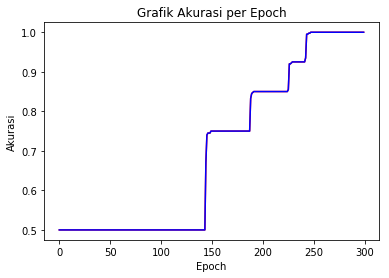

In [18]:
# create plot
plt.clf()

x = np.arange(epoch)
y1 = trainakurasi.copy()
y2 = validakurasi.copy()

plt.plot(x,y1, color ='red')
plt.plot(x,y2, color = 'blue')
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.title("Grafik Akurasi per Epoch")
plt.show()